# Importing Libraries

In [1]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import tensorflow as tf # Deep learning library
import sklearn # Machine learning tasks
import keras # Importing the Keras library, an API running on top of TensorFlow for building and training neural networks

from sklearn.preprocessing import LabelEncoder # Encoding categorical variables into numerical values
from sklearn.preprocessing import MinMaxScaler # Scaling features to a range
from sklearn.model_selection import train_test_split # Splitting the dataset into training and testing sets
from sklearn.metrics import accuracy_score # Evaluating the model's accuracy

from keras.models import Sequential # Importing the Sequential model for defining neural networks
from keras.layers import InputLayer, Dense, Dropout # Importing layers for constructing the neural network architecture
from keras.optimizers import Adam # Importing the Adam optimizer for training the model

# Loading Data

In [2]:
# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

# Remove whitespace from column names
data.columns = data.columns.str.strip()

# Display the first few rows of the dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# Preprocessing

In [4]:
# Encode categorical variables into numerical values to make them suitable for modeling

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
object_columns = ['education', 'self_employed', 'loan_status', 'no_of_dependents']

# Iterate through each column and encode its values
for column in object_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [5]:
# Scale features to a range between 0 and 1, which helps in improving the convergence and performance of machine learning algorithms

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'no_of_dependents' column to a range between 0 and 1
data['no_of_dependents'] = data['no_of_dependents'] / 5

# Scale all the features to a range between 0 and 1
columns = data.columns[1:]

for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

In [6]:
# Displaying the first five rows of pre-processed data and removing the 'loan_id' column as it is unnecessary

data = data.drop('loan_id', axis=1)
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0
1,0.0,1.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0
2,0.6,0.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1.0
3,0.6,0.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1.0
4,1.0,1.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0


In [7]:
# Separating independent and dependent variables

X = data.drop('loan_status', axis=1)  # Independent variables
y = data['loan_status']  # Dependent variable

# Checking the shape of independent and dependent variables
X.shape, y.shape

((4269, 11), (4269,))

# Creating Training and Validation Sets

In [8]:
# Splitting data for training and validation

# Parameters:
#   - X: Features
#   - y: Target labels
#   - Stratify: Ensures balanced distribution of target labels
#   - Random_state: Seed for reproducible splits
#   - Test_size: Proportion of data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['loan_status'], random_state=10, test_size=0.2)

# Checking shapes
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((3415, 11), (3415,)), ((854, 11), (854,)))

# Model Architecture Definition

In [9]:
# Defining neural network architecture

# Number of input neurons is determined by the number of features in the training data.
# It's calculated as X_train.shape[1], where X_train contains input features.
input_neurons = X_train.shape[1]

# For binary classification, one output neuron is used.
output_neurons = 1

# Number of hidden layers and neurons in each layer.
# The specified hidden layers and neurons determine the model's capacity and complexity.
hidden_layers = 2
neuron_hidden_layer_1 = 11
neuron_hidden_layer_2 = 5

# Define the model architecture using the Sequential API.
model = Sequential()

# The input layer is set up with the specified number of input neurons.
model.add(InputLayer(input_shape=(input_neurons,)))

# The first hidden layer consists of neurons with 'tanh' activation function,
# and dropout regularization is applied to prevent overfitting.
model.add(Dense(units=neuron_hidden_layer_1, activation='tanh'))
model.add(Dropout(0.5))

# Similar to the first hidden layer, the second hidden layer is added with dropout for regularization.
model.add(Dense(units=neuron_hidden_layer_2, activation='tanh'))
model.add(Dropout(0.5))

# The output layer has a single neuron with a sigmoid activation function for binary classification.
model.add(Dense(units=output_neurons, activation='sigmoid'))

# Display model summary providing an overview of the model's layers and parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 60        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198 (792.00 Byte)
Trainable params: 198 (792.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

In [10]:
# Compiling and configuring the model for training
# Parameters:
#   - Loss: Binary crossentropy measures the difference between true labels and predicted probabilities.
#   - Optimizer: Adam adapts the learning rate during training for efficient optimization.
#   - Metrics: Accuracy is used to evaluate model performance.
adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Training the compiled model on the training data
# Parameters:
#   - X_train: Input features of the training data.
#   - y_train: Target labels of the training data.
#   - Validation_data: Validation data used during training.
#   - Epochs: Number of times the entire training dataset is passed through the model.
#   - Batch_size: Number of samples processed before updating the model's parameters.
# Return value:
#   - model_history: History object containing training process information.
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
54/54 [==============================] - 2s 7ms/step - loss: 0.7124 - accuracy: 0.5312 - val_loss: 0.6642 - val_accuracy: 0.6218
Epoch 2/30
54/54 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5734 - val_loss: 0.6446 - val_accuracy: 0.6218
Epoch 3/30
54/54 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.6038 - val_loss: 0.6276 - val_accuracy: 0.6218
Epoch 4/30
54/54 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6249 - val_loss: 0.6055 - val_accuracy: 0.6323
Epoch 5/30
54/54 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6524 - val_loss: 0.5747 - val_accuracy: 0.6733
Epoch 6/30
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7104 - val_loss: 0.5303 - val_accuracy: 0.7564
Epoch 7/30
54/54 [==============================] - 0s 4ms/step - loss: 0.5424 - accuracy: 0.7523 - val_loss: 0.4752 - val_accuracy: 0.8290
Epoch 8/30
54/54 [==

# Model Prediction

In [11]:
# Predicts the target variable using the trained model on the test dataset.
predictions = model.predict(X_test)

# Discretization of predictions
# Converts the continuous prediction values into discrete values (0 or 1) based on a threshold of 0.5.
predictions_discrete = [0 if value < 0.5 else 1 for value in predictions]

# Checking target variable distribution after prediction
# Creates a DataFrame 'y_test_df' to store the target variable 'loan_status' from the test dataset.
# Computes the distribution of the target variable values (loan approval status) after prediction.
# The result is displayed as a percentage to represent the class distribution.
y_test_df = pd.DataFrame(y_test, columns=['loan_status'])
class_distribution = y_test_df['loan_status'].value_counts(normalize=True) * 100
print("\nClass Distribution:")
print(class_distribution)

27/27 [==============================] - 0s 2ms/step

Class Distribution:
0.0    62.177986
1.0    37.822014
Name: loan_status, dtype: float64


# Model Evaluation

In [12]:
# Evaluate the model and retrieve accuracy
# The model.evaluate() function returns both the loss and accuracy of the model
# on the test data. The index [1] is used to extract the accuracy from the returned values.
accuracy = model.evaluate(X_test, y_test)[1]

print("Accuracy:", accuracy)

27/27 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9227
Accuracy: 0.9227166175842285


# Model Training Progress Visualization

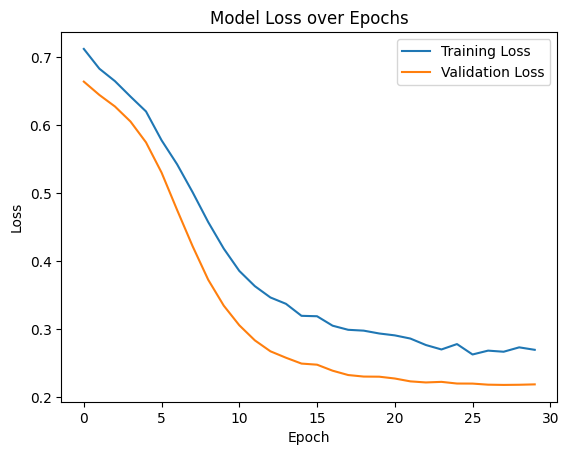

In [13]:
# Visualizing model loss over epochs

plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

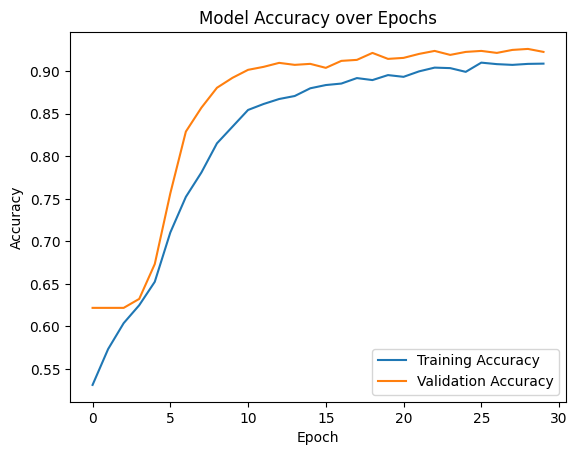

In [14]:
# Visualizing model accuracy over epochs

plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()